<a href="https://colab.research.google.com/github/harishjungshahi/Deep-Learning/blob/main/Applying_Different_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
from torch import nn, optim
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

In [5]:
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)
test_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 305kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.58MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.9MB/s]


In [6]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [7]:
batch_size = 64

train_loader = DataLoader(training_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [8]:
for images, labels in train_loader:
  print(images.shape, labels.shape)
  break

torch.Size([64, 1, 28, 28]) torch.Size([64])


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

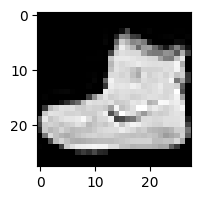

In [15]:
plt.figure(figsize=(2,2))
plt.imshow(images[0].squeeze(), cmap='gray')
plt

In [16]:
labels[0]

tensor(9)

In [22]:
classes = [
    "T-shirts/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

classes[labels[0].item()]

'Ankle boot'

In [23]:
device = ("cuda" if torch.cuda.is_available()
else "mps" if torch.backends.mps.is_available()
else "cpu")
device

'cpu'

In [24]:
class ClothsClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.network(x)

In [33]:
model = ClothsClassifier().to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

In [34]:
epochs = 2

for epoch in range(epochs):
  for batch, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    # 1. Forward Pass
    pred = model(images)
    loss = loss_fn(pred, labels)
    # 2. Backward Pass
    loss.backward()
    # 3. Weight Update
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      print(f"batch: {batch}, loss: {loss.item()}")

# SDG without momentum (2.31 ==> 2.02)
# SDG with momentum (2.31 ==> 0.66)
# SDG with momentum (2.297 ==> 0.504)

batch: 0, loss: 2.297024726867676
batch: 100, loss: 0.8155674338340759
batch: 200, loss: 0.4747822880744934
batch: 300, loss: 0.6104410886764526
batch: 400, loss: 0.5182310938835144
batch: 500, loss: 0.45831406116485596
batch: 600, loss: 0.4273711144924164
batch: 700, loss: 0.6361613273620605
batch: 800, loss: 0.5737084746360779
batch: 900, loss: 0.5452316403388977
batch: 0, loss: 0.3190544545650482
batch: 100, loss: 0.41944295167922974
batch: 200, loss: 0.3152002692222595
batch: 300, loss: 0.4636516571044922
batch: 400, loss: 0.4490826725959778
batch: 500, loss: 0.37288153171539307
batch: 600, loss: 0.35208672285079956
batch: 700, loss: 0.567132830619812
batch: 800, loss: 0.49679943919181824
batch: 900, loss: 0.5048259496688843


In [35]:
# Testing the model
model.eval() # switch to evaluation mode
all_predicted = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Append label and predictions to to lists
        all_predicted.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

In [36]:
len(all_predicted)

60000

In [37]:
from sklearn.metrics import classification_report
report = classification_report(all_labels, all_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6000
           1       0.98      0.98      0.98      6000
           2       0.85      0.63      0.73      6000
           3       0.85      0.90      0.88      6000
           4       0.64      0.91      0.76      6000
           5       0.97      0.94      0.96      6000
           6       0.77      0.57      0.66      6000
           7       0.89      0.97      0.93      6000
           8       0.95      0.98      0.96      6000
           9       0.98      0.92      0.95      6000

    accuracy                           0.86     60000
   macro avg       0.87      0.86      0.86     60000
weighted avg       0.87      0.86      0.86     60000



In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_predicted)
cm

array([[5036,   17,   98,  323,   37,    7,  390,    0,   92,    0],
       [   6, 5860,    3,  112,    9,    1,    8,    0,    1,    0],
       [  51,   13, 3783,   71, 1716,    1,  324,    0,   41,    0],
       [ 157,   58,   34, 5421,  243,    1,   72,    0,   14,    0],
       [   5,    5,  146,  176, 5469,    0,  180,    0,   19,    0],
       [   2,    0,    1,    1,    0, 5629,    0,  304,   13,   50],
       [ 900,   12,  355,  219,  976,    1, 3421,    0,  116,    0],
       [   0,    0,    0,    0,    0,   62,    0, 5844,   14,   80],
       [   9,    5,   14,   23,   33,    7,   31,   19, 5858,    1],
       [   0,    2,    0,    0,    0,   73,    0,  403,    5, 5517]])

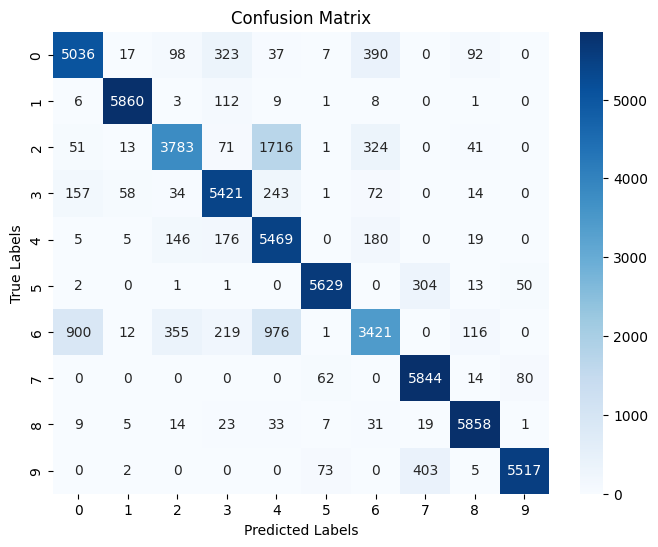

In [39]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()